In [ ]:
import pandas as pd
dados = pd.read_csv("imoveis.csv", sep = ';')    #Importando Pandas e arquivo CSV


In [ ]:
# Pandas Options
#https://pandas.pydata.org/pandas-docs/version/1.2.4/user_guide/options.html


In [ ]:
# Configurando separados de milhar para float
pd.__version__
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# descrição estatística do dataframe
labels = ['count', 'mean', 'min', 'max', '25%', '50%',"75%"]
dados.describe().loc[labels]

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,"32,960.00","32,960.00","32,960.00","32,960.00","32,943.00","28,867.00","22,723.00"
mean,1.77,1.75,0.67,231.90,"12,952.66","2,388.06","2,364.41"
min,0.00,0.00,0.00,0.00,75.00,1.00,1.00
max,100.00,"1,966.00",70.00,"90,000.00","120,000,000.00","6,552,570.00","27,053,070.00"
25%,0.00,0.00,0.00,55.00,"1,500.00",590.00,110.00
50%,2.00,1.00,0.00,87.00,"2,800.00",990.00,250.00
75%,3.00,2.00,1.00,170.00,"6,500.00","1,800.00",697.00


In [ ]:
# Métodos de Detecção de Outliers
### Boxplot ou Diagrama de Caixa

# Duas das principais características de um box plot é a possibilidade de identificar 
# a simetria ou assimetria do conjunto de dados e a presença de outliers.


In [ ]:
import matplotlib.pyplot as plt    #importando matplotlib.pylot e numpy 
%matplotlib inline
import numpy as np

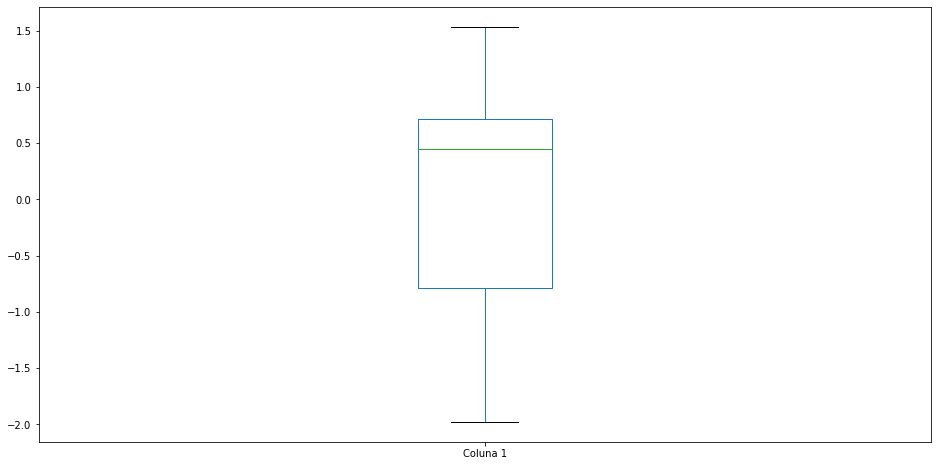

In [ ]:
np.random.seed(2231)                                                           #Aplicando random.seed para geração de numeros aleatorios passando como seed 2231, Localizando alinha em bloxpot
df = pd.DataFrame(np.random.randn(10, 4),
                 columns = ['Coluna 1', 'Coluna 2', 'Coluna 3', 'Coluna 4']
                 )

plt.rc('figure', figsize = (16, 8))
df.boxplot(column = 'Coluna 1',
            grid=False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


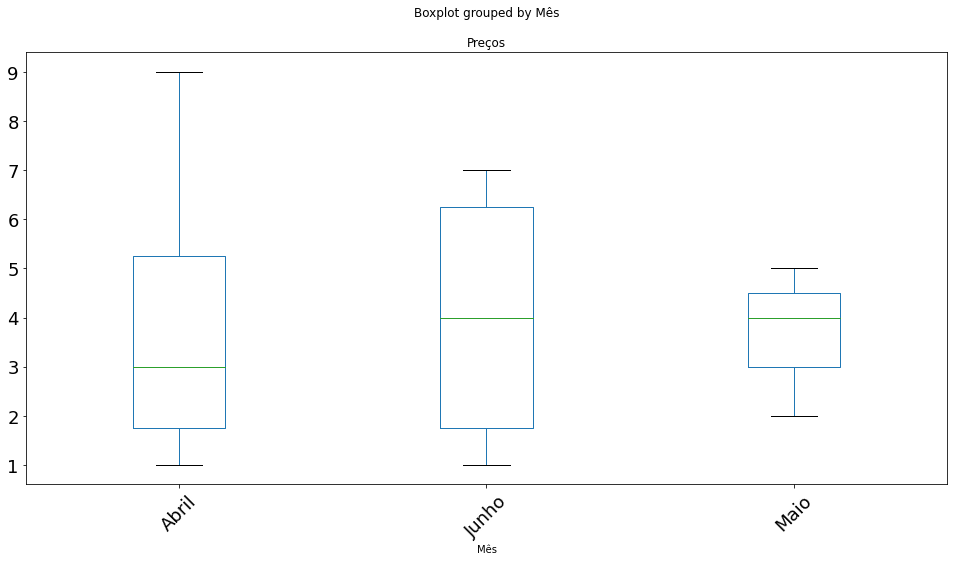

In [ ]:
### Exemplo com agrupamento de campos

# lista de meses
meses = ['Abril','Abril','Abril','Abril', 'Maio', 'Maio', 'Maio', 'Junho', 'Junho', 'Junho','Junho']
# lista de preços
preços = [4, 1, 9, 2, 2, 4, 5, 7, 6, 1, 2]

df = pd.DataFrame({'Mês' : meses, 
                   'Preços' : preços})

boxplot = df.boxplot(column = ['Preços'], 
                     by = 'Mês',
                     fontsize = 18,
                     rot = 45,
                     grid = False)

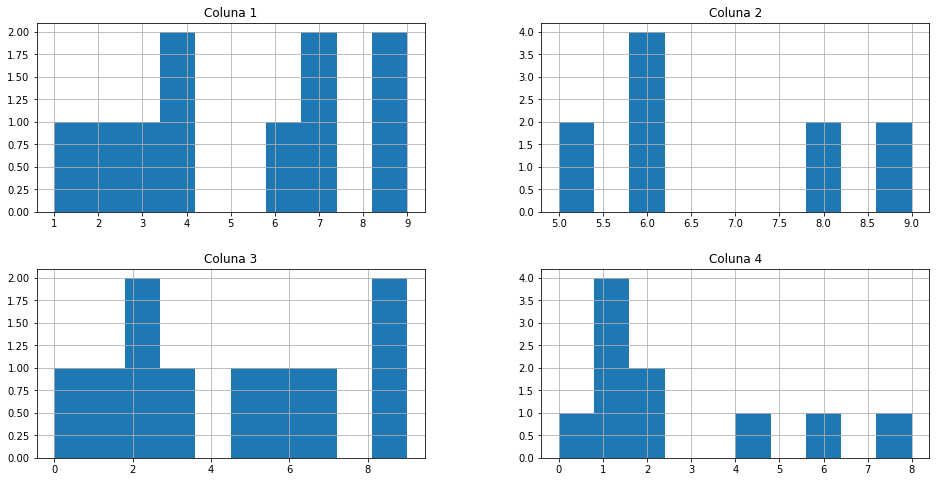

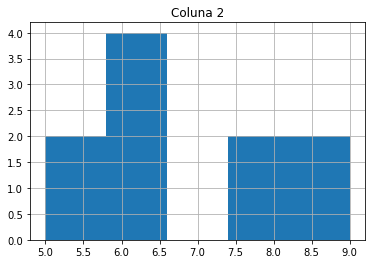

In [ ]:
### Histograma
# Gráfico de barras que demonstra uma distribuição de frequências.
# A base de cada barra representa uma classe e a altera a quantidade ou frequência absoluta
# com que o valor de cada classe ocorre.

# inicia o gerador de números aleatórios do Numpy
np.random.seed(4321)

# criando o Data Frame
df = pd.DataFrame(np.random.randint(0, 10, (10, 4)),
                  columns=['Coluna 1', 'Coluna 2', 'Coluna 3', 'Coluna 4'])

ax = df.hist()

hist = df.hist(column = "Coluna 2", 
               bins=5, 
               figsize=(6, 4))


In [ ]:
# exemplo com notas
media, desvio, linhas = 5, 1.47, 1000

notas = pd.Series(np.random.normal(media, desvio, linhas).round(2))


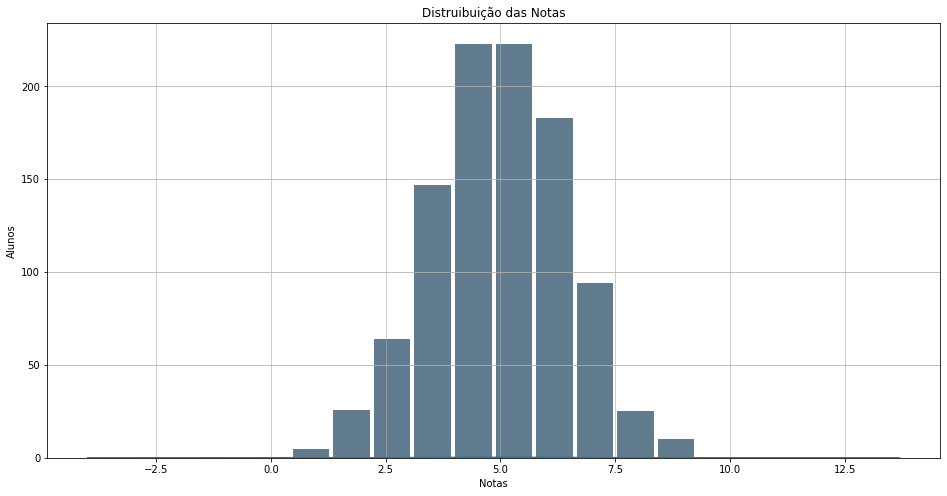

In [ ]:
# Kernel Density Estimation
notas.plot.kde()

notas.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')

plt.title('Distruibuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Alunos')
plt.grid(axis='x', alpha=0.75)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,"15,000,000.00",nan,"1,000.00"
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,"120,000,000.00",nan,"10,000.00"
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,"1,250,000.00","1,186.00",320.00
23491,Apartamento,Botafogo,4,1,1,300,"4,500,000.00","1,100.00",nan
25632,Prédio Inteiro,Humaitá,0,96,0,8279,"1,324,640.00","165,580.00","96,889.00"
26327,Conjunto Comercial/Sala,Caju,0,0,0,10660,"1,279,200.00",nan,nan
28047,Prédio Inteiro,Humaitá,0,96,0,8279,"1,076,270.00",nan,nan


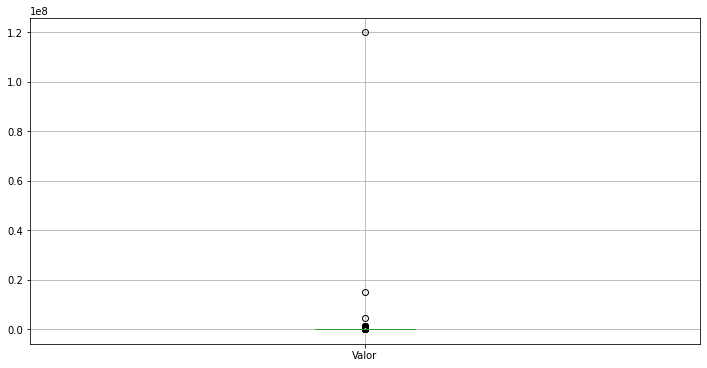

In [ ]:
# De volta ao imóveis
dados = pd.read_csv("imoveis.csv", sep=';')

# boxplot
plt.rc('figure', figsize = (12, 6))
dados.boxplot(['Valor'])


dados[dados['Valor'] >= 1000000]


In [ ]:
# Primeiros testes removendo Outliers
valor = dados['Valor']
valor


0       1,700.00
1       7,000.00
2       5,200.00
3         800.00
4         800.00
          ...   
32955     800.00
32956   1,800.00
32957   1,400.00
32958   3,000.00
32959   6,500.00
Name: Valor, Length: 32960, dtype: float64

In [ ]:
# Utilizando Quartis
#
# Na estatística descritiva, um quartil é qualquer um dos três valores que divide o conjunto ordenado 
# de dados em quatro partes iguais, e assim cada parte representa 1/4 da amostra ou população.
# Assim, no caso duma amostra ordenada,
# - primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
# - segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
# - terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil
# A diferença entre os quartis superior e inferior chama-se amplitude inter-quartil.

In [ ]:
# Calculando

# primeiro quartil
Q1 = valor.quantile(.25)
Q1

1500.0

In [ ]:
# terceiro quartil
Q3 = valor.quantile(.75)
Q3


6500.0

In [ ]:
# cálculo do intervalo interquartil
IIQ = Q3 - Q1
IIQ

5000.0

In [ ]:
limite_inferior = 1.5 * IIQ - Q1     
limite_inferior

6000.0

In [ ]:
limite_superior = 1.5 * IIQ + Q3
limite_superior


14000.0

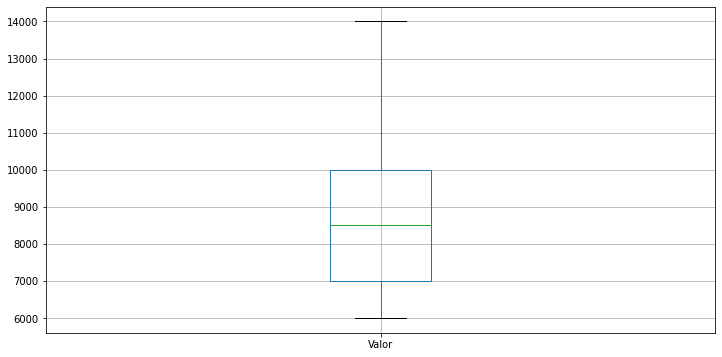

In [ ]:
# dataframe com os outliers removidos
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_novo = dados[selecao]
dados_novo

dados_novo.boxplot(['Valor'])
